<a href="https://colab.research.google.com/github/AlexTran448/BiologyNotebooks/blob/main/protein_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1
Here we introduce concentration measurements of mRNA (taken by microarray) and protein
(taken by LC-MS) derived from 500 genes. These genes are expressed at different concentrations
dependent upon the phases (G1, G2, S and M) within the cell cycle using the dataset provided,
alongside some terms that indicate biological process (GOBP), molecular function (GOMF) and
where they are located in the cell/component (GOCC). As computational biologists, we are
very interested in modelling the concentration of protein in particular, as proteins influence the
majority of cell behaviour.
We will attempt to answer the question “Can the concentration of any particular protein be
reliably inferred from it’s respective mRNA level?”


Import the cell cycle dataset excel spreadsheet (using Pandas). You may need to do some
tidying of the data such as dropping rows with missing NaN values

In [ ]:
import pandas as pd

dataframe = pd.read_excel('Cell-Cycle-Set.xlsx')
dataframe.dropna(inplace=True)
dataframe.head(5)

,Gene_Name,mean_RNA_G1,mean_RNA_S,mean_RNA_G2,mean_protein_G1,mean_protein_S,mean_protein_G2,GOBP,GOMF,GOCC
1,RBM47,10.330107,10.396423,10.677257,24.748020,22.426777,24.651200,base conversion or substitution editing;biolog...,binding;nucleic acid binding;nucleotide bindin...,apolipoprotein B mRNA editing enzyme complex;c...
2,ADAM9,12.321340,12.203630,12.233293,19.083593,16.248873,19.281277,activation of MAPKK activity;activation of pro...,binding;catalytic activity;cation binding;coll...,cell part;extracellular region part;extracellu...
3,UBA6,10.827333,10.758463,10.685847,24.614467,21.356450,25.207883,catabolic process;cellular catabolic process;c...,adenyl nucleotide binding;adenyl ribonucleotid...,cell part;cytoplasm;intracellular part
5,SHTN1,10.845517,10.824347,10.634980,26.112690,22.905927,26.138843,axon guidance;chemotaxis;locomotion;response t...,binding;enzyme binding;kinase binding;protein ...,axon;cell part;cell projection;neuron projection
6,SIL1,9.042438,8.924093,9.035878,22.750520,20.598227,23.093443,cellular macromolecule metabolic process;cellu...,binding;protein binding;unfolded protein binding,cell part;cytoplasmic part;endoplasmic reticul...


• Calculate the variance and mean of the protein and mRNA concentrations


In [ ]:
dataframe.mean(numeric_only=True)

mean_RNA_G1        11.215627
mean_RNA_S         11.186962
mean_RNA_G2        11.257939
mean_protein_G1    25.351672
mean_protein_S     22.847658
mean_protein_G2    25.573553
dtype: float64

In [ ]:
dataframe.var(numeric_only=True)

mean_RNA_G1         2.160506
mean_RNA_S          2.145592
mean_RNA_G2         2.101649
mean_protein_G1    10.453574
mean_protein_S     10.403018
mean_protein_G2    10.018217
dtype: float64

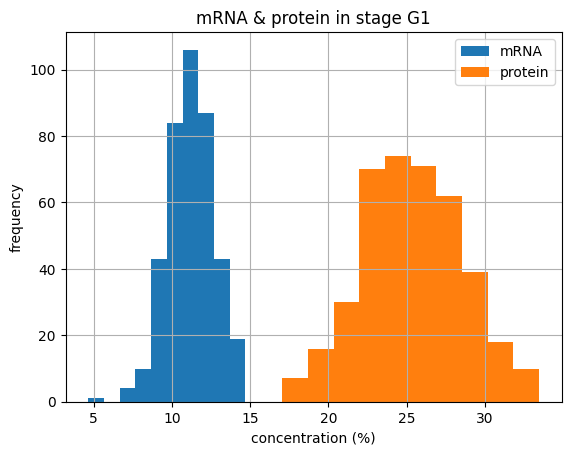

In [ ]:
import matplotlib.pyplot as plt
ax = dataframe.hist('mean_RNA_G1', label='mRNA')
dataframe.hist('mean_protein_G1', ax=ax, label='protein')
plt.title('mRNA & protein in stage G1')
plt.xlabel('concentration (%)')
plt.ylabel('frequency')
plt.legend()
plt.show()

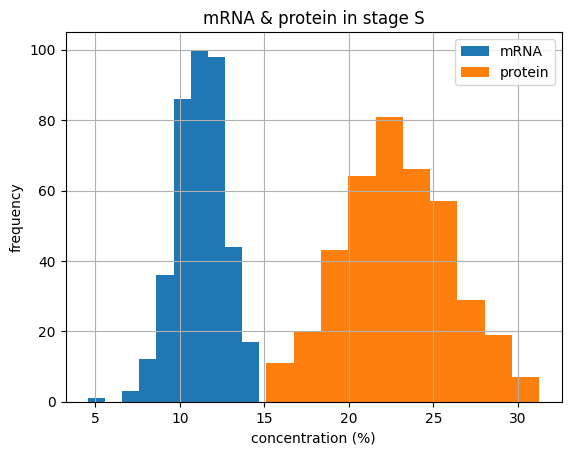

In [ ]:
ax = dataframe.hist('mean_RNA_S', label='mRNA')
dataframe.hist('mean_protein_S', ax=ax, label='protein')
plt.title('mRNA & protein in stage S')
plt.xlabel('concentration (%)')
plt.ylabel('frequency')
plt.legend()
plt.show()

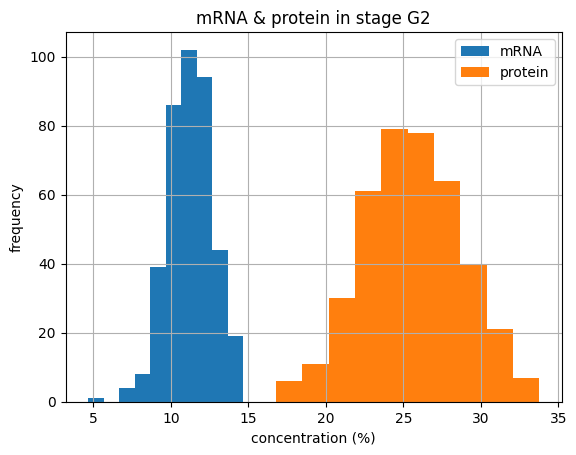

In [ ]:
ax = dataframe.hist('mean_RNA_G2', label='mRNA')
dataframe.hist('mean_protein_G2', ax=ax, label='protein')
plt.title('mRNA & protein in stage G2')
plt.xlabel('concentration (%)')
plt.ylabel('frequency')
plt.legend()
plt.show()

mRNA and proteins follow a similar distribution however have different means and variance.

mRNA has a smalelr mean and variance than the proteins.

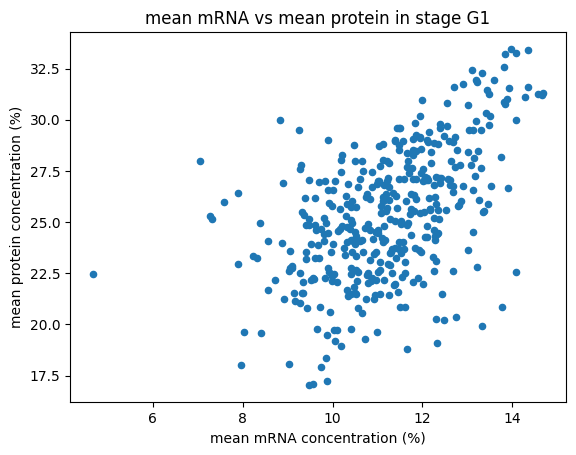

In [ ]:
dataframe.plot.scatter('mean_RNA_G1','mean_protein_G1')
plt.title('mean mRNA vs mean protein in stage G1')
plt.xlabel('mean mRNA concentration (%)')
plt.ylabel('mean protein concentration (%)')
plt.show()

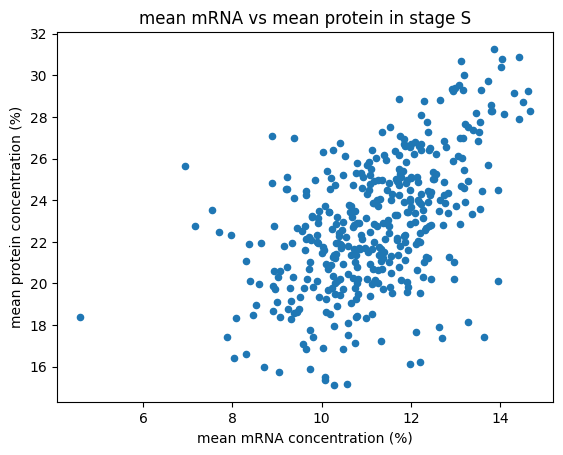

In [ ]:
dataframe.plot.scatter('mean_RNA_S','mean_protein_S')
plt.title('mean mRNA vs mean protein in stage S')
plt.xlabel('mean mRNA concentration (%)')
plt.ylabel('mean protein concentration (%)')
plt.show()


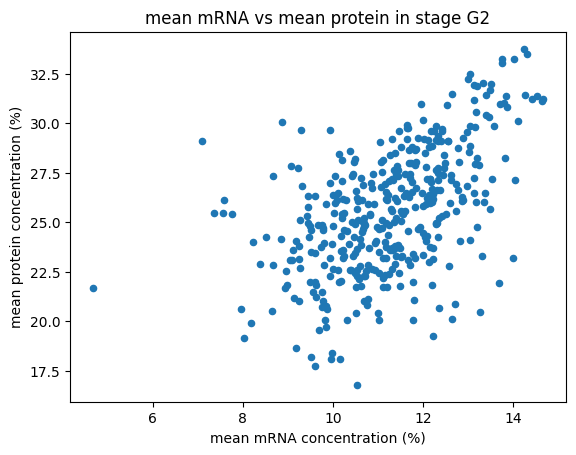

In [ ]:
dataframe.plot.scatter('mean_RNA_G2','mean_protein_G2')
plt.title('mean mRNA vs mean protein in stage G2')
plt.xlabel('mean mRNA concentration (%)')
plt.ylabel('mean protein concentration (%)')
plt.show()


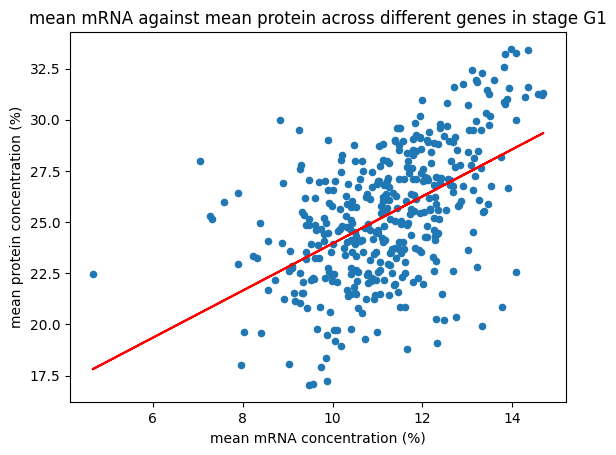

Mean Squared Error:
7.578820884477156
Mean Absolute Error
2.2227060935069662


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

model = LinearRegression().fit(dataframe[['mean_RNA_G1']], dataframe[['mean_protein_G1']])

X = dataframe[['mean_RNA_G1']]
y = model.predict(X)

dataframe.plot.scatter('mean_RNA_G1','mean_protein_G1')
plt.plot(X['mean_RNA_G1'], y, color='red')
plt.title('mean mRNA against mean protein across different genes in stage G1')
plt.xlabel('mean mRNA concentration (%)')
plt.ylabel('mean protein concentration (%)')
plt.show()

print('Mean Squared Error:')
print(mean_squared_error(dataframe['mean_protein_G1'],y) )
print('Mean Absolute Error')
print(mean_absolute_error(dataframe['mean_protein_G1'],y) )

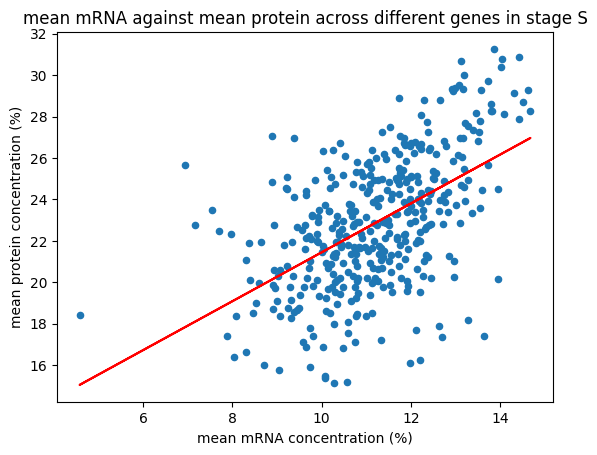

Mean Squared Error:
7.393480189565748
Mean Absolute Error
2.1703934588446705


In [ ]:
model = LinearRegression().fit(dataframe[['mean_RNA_S']], dataframe[['mean_protein_S']])

X = dataframe[['mean_RNA_S']]
y = model.predict(X)

dataframe.plot.scatter('mean_RNA_S','mean_protein_S')
plt.plot(X['mean_RNA_S'], y, color='red')
plt.title('mean mRNA against mean protein across different genes in stage S')
plt.xlabel('mean mRNA concentration (%)')
plt.ylabel('mean protein concentration (%)')
plt.show()


print('Mean Squared Error:')
print(mean_squared_error(dataframe['mean_protein_S'],y) )
print('Mean Absolute Error')
print(mean_absolute_error(dataframe['mean_protein_S'],y) )

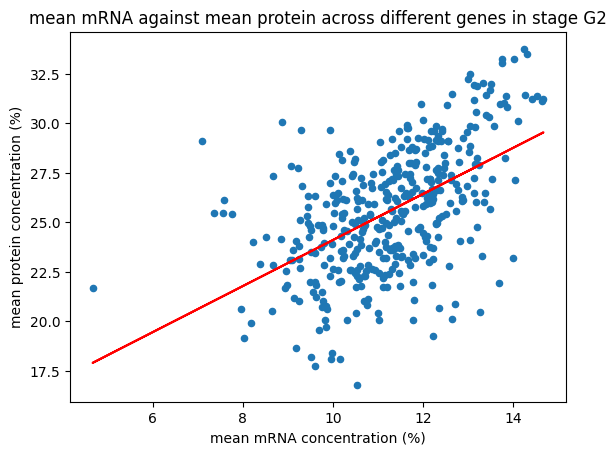

Mean Squared Error:
7.158717649450784
Mean Absolute Error
2.1517005109705045


In [ ]:
model = LinearRegression().fit(dataframe[['mean_RNA_G2']], dataframe[['mean_protein_G2']])

X = dataframe[['mean_RNA_G2']]
y = model.predict(X)

dataframe.plot.scatter('mean_RNA_G2','mean_protein_G2')
plt.plot(X['mean_RNA_G2'], y, color='red')
plt.title('mean mRNA against mean protein across different genes in stage G2')
plt.xlabel('mean mRNA concentration (%)')
plt.ylabel('mean protein concentration (%)')
plt.show()



print('Mean Squared Error:')
print(mean_squared_error(dataframe['mean_protein_G2'],y) )
print('Mean Absolute Error')
print(mean_absolute_error(dataframe['mean_protein_G2'],y) )

Using linear regression, we can see that there are many points that are far from the line of best fit.
This shows that the concentration of proteins cannot be reliably predicted from the concentration of mRNA.

Using mean squared error or absolute error (distance from the line of best fit) as a measure of reliability, we can see that the concentration of proteins cannot be reliably predicted from the concentration of mRNA.

The errors are high which is reflective of the large variance present in the dataset.
This suggest that mRNA may not be suitable.

# Part 2
Find all genes that contain ‘cell cycle’ in their GOBP term and plot them as a scatterplot (with different colour) overlaid across all genes for each cell cycle phase.

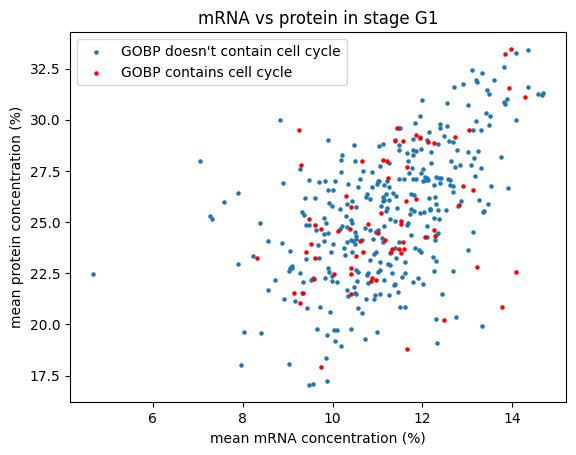

In [ ]:
not_cell_cycle_genes = dataframe[~dataframe['GOBP'].str.contains('cell cycle', case=False)]
cell_cycle_genes = dataframe[dataframe['GOBP'].str.contains('cell cycle', case=False)]

ax = not_cell_cycle_genes.plot.scatter('mean_RNA_G1','mean_protein_G1', title='mRNA vs protein in stage G1', xlabel='mean mRNA', ylabel='mean protein', label='GOBP doesn\'t contain cell cycle', marker='.')
cell_cycle_genes.plot.scatter('mean_RNA_G1','mean_protein_G1', color='red', ax=ax, label='GOBP contains cell cycle', marker='.')
plt.xlabel('mean mRNA concentration (%)')
plt.ylabel('mean protein concentration (%)')
ax.legend()
plt.show()

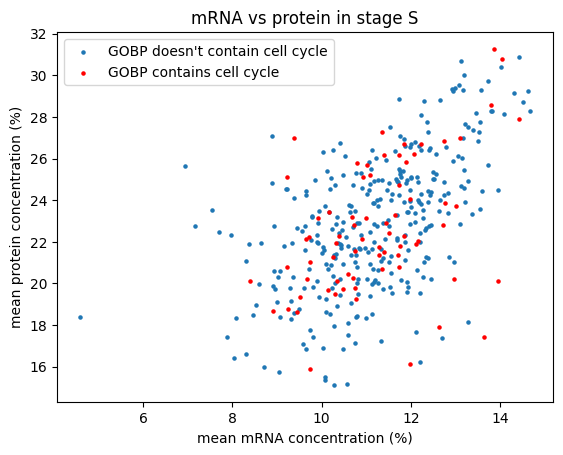

In [ ]:
ax = not_cell_cycle_genes.plot.scatter('mean_RNA_S','mean_protein_S', title='mRNA vs protein in stage S', xlabel='mean mRNA', ylabel='mean protein', label='GOBP doesn\'t contain cell cycle', marker='.')
cell_cycle_genes.plot.scatter('mean_RNA_S','mean_protein_S', color='red', ax=ax, label='GOBP contains cell cycle', marker='.')
plt.xlabel('mean mRNA concentration (%)')
plt.ylabel('mean protein concentration (%)')
ax.legend()
plt.show()

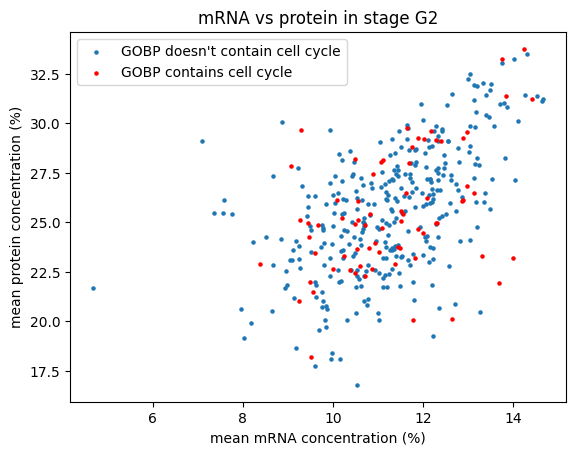

In [ ]:
ax = not_cell_cycle_genes.plot.scatter('mean_RNA_G2','mean_protein_G2', title='mRNA vs protein in stage G2', xlabel='mean mRNA', ylabel='mean protein', label='GOBP doesn\'t contain cell cycle', marker='.')
cell_cycle_genes.plot.scatter('mean_RNA_G2','mean_protein_G2', color='red', ax=ax, label='GOBP contains cell cycle', marker='.')
plt.xlabel('mean mRNA concentration (%)')
plt.ylabel('mean protein concentration (%)')
ax.legend()
plt.show()

Calculate the correlations.

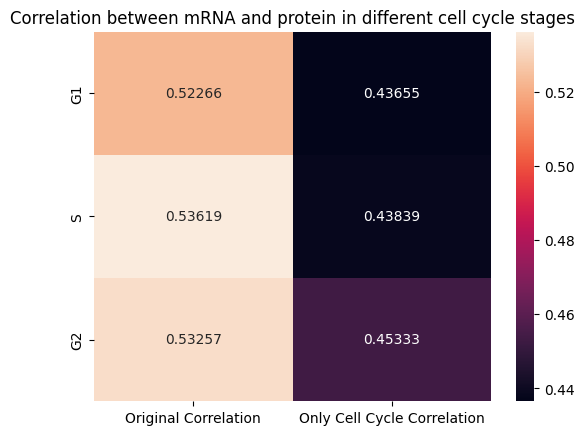

In [ ]:
import seaborn as sns


g1_corr = dataframe['mean_RNA_G1'].corr(dataframe['mean_protein_G1'])
s_corr = dataframe['mean_RNA_S'].corr(dataframe['mean_protein_S'])
g2_corr = dataframe['mean_RNA_G2'].corr(dataframe['mean_protein_G2'])

cc_g1_corr = cell_cycle_genes['mean_RNA_G1'].corr(cell_cycle_genes['mean_protein_G1'])
cc_s_corr =  cell_cycle_genes['mean_RNA_S'].corr(cell_cycle_genes['mean_protein_S'])
cc_g2_corr =  cell_cycle_genes['mean_RNA_G2'].corr(cell_cycle_genes['mean_protein_G2'])

dic = {'Original Correlation': [g1_corr, s_corr, g2_corr],
       'Only Cell Cycle Correlation': [cc_g1_corr, cc_s_corr, cc_g2_corr]}
data = pd.DataFrame(dic)
sns.heatmap(data=data, annot=data, yticklabels=['G1','S','G2'], fmt='.5g')
plt.title("Correlation between mRNA and protein in different cell cycle stages")
plt.show()

The correlation between mRNA and protein concentration is lower for genes with ‘cell cycle’ than for all genes.

This is likely due to the fact that the 'cell cycle' involves replicating DNA information to create new cells and contain other functions besides protein sythesis.

Find all genes that contain ‘ribosome’ in their GOCC term and plot them as a scatterplot (with different colour) overlaid across all genes for each cell cycle phase.

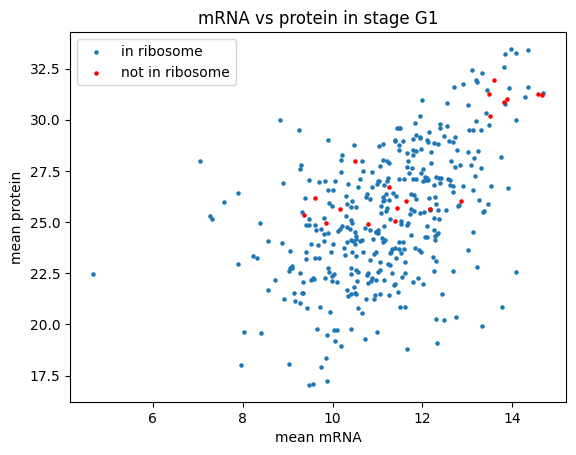

In [ ]:
not_ribosome_genes = dataframe[~dataframe['GOCC'].str.contains('ribosome', case=False)]
ribosome_genes = dataframe[dataframe['GOCC'].str.contains('ribosome', case=False)]


ax = not_ribosome_genes.plot.scatter('mean_RNA_G1','mean_protein_G1', title='mRNA vs protein in stage G1', xlabel='mean mRNA', ylabel='mean protein', label='in ribosome', marker='.')
ribosome_genes.plot.scatter('mean_RNA_G1','mean_protein_G1', color='red', ax=ax, label='not in ribosome', marker='.')
plt.xlabel('mean mRNA')
plt.ylabel('mean protein')
ax.legend()
plt.show()

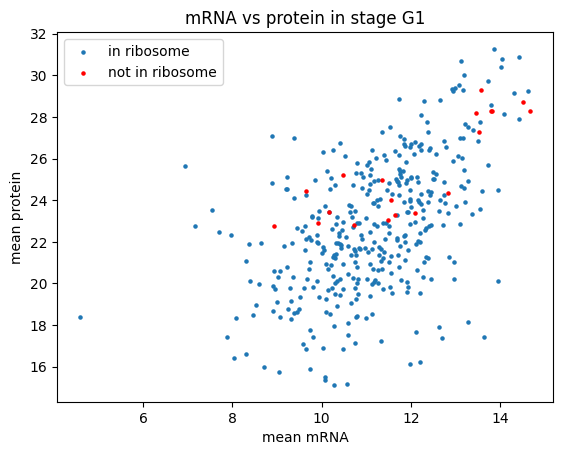

In [ ]:
ax = not_ribosome_genes.plot.scatter('mean_RNA_S','mean_protein_S', title='mRNA vs protein in stage G1', xlabel='mean mRNA', ylabel='mean protein', label='in ribosome', marker='.')
ribosome_genes.plot.scatter('mean_RNA_S','mean_protein_S', color='red', ax=ax, label='not in ribosome', marker='.')
plt.xlabel('mean mRNA')
plt.ylabel('mean protein')
ax.legend()
plt.show()

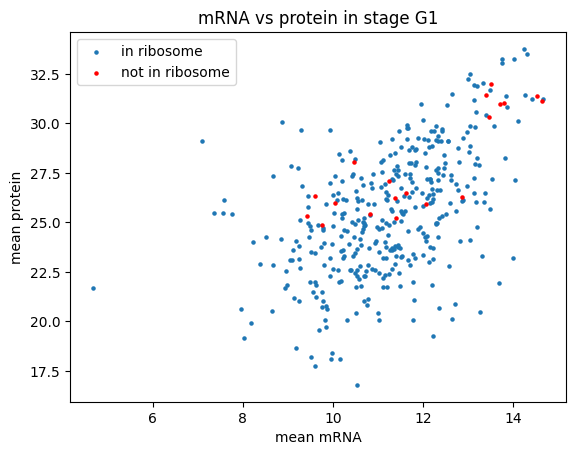

In [ ]:
ax = not_ribosome_genes.plot.scatter('mean_RNA_G2','mean_protein_G2', title='mRNA vs protein in stage G1', xlabel='mean mRNA', ylabel='mean protein', label='in ribosome', marker='.')
ribosome_genes.plot.scatter('mean_RNA_G2','mean_protein_G2', color='red', ax=ax, label='not in ribosome', marker='.')
plt.xlabel('mean mRNA')
plt.ylabel('mean protein')
ax.legend()
plt.show()

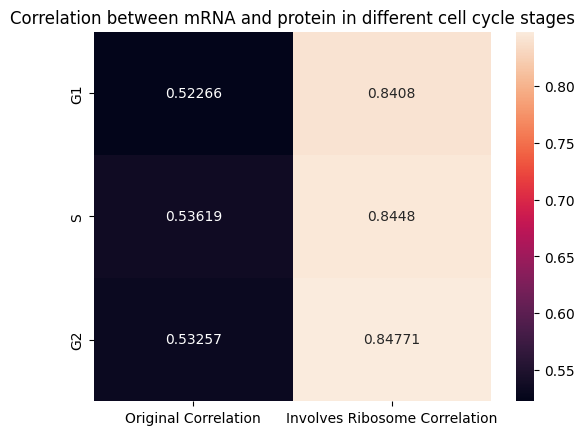

In [ ]:
import seaborn as sns


g1_corr = dataframe['mean_RNA_G1'].corr(dataframe['mean_protein_G1'])
s_corr = dataframe['mean_RNA_S'].corr(dataframe['mean_protein_S'])
g2_corr = dataframe['mean_RNA_G2'].corr(dataframe['mean_protein_G2'])

cc_g1_corr = ribosome_genes['mean_RNA_G1'].corr(ribosome_genes['mean_protein_G1'])
cc_s_corr =  ribosome_genes['mean_RNA_S'].corr(ribosome_genes['mean_protein_S'])
cc_g2_corr =  ribosome_genes['mean_RNA_G2'].corr(ribosome_genes['mean_protein_G2'])

dic = {'Original Correlation': [g1_corr, s_corr, g2_corr],
       'Involves Ribosome Correlation': [cc_g1_corr, cc_s_corr, cc_g2_corr]}
data = pd.DataFrame(dic)
sns.heatmap(data=data, annot=data, yticklabels=['G1','S','G2'], fmt='.5g')
plt.title("Correlation between mRNA and protein in different cell cycle stages")
plt.show()

The correlation involving only ribosomes is greater than without.
This is likely due to the fact that the ribosome is the site where protein sythesis occur.

Count the number of occurrences of every GOBP term across all genes, what are some of the difficulties that arise when using these terms?

In [ ]:
GOBP_terms = dataframe['GOBP'].str.split(r';|,', expand=True).stack().value_counts()
GOBP_terms

cellular process                                                                                       377
metabolic process                                                                                      273
cellular metabolic process                                                                             260
primary metabolic process                                                                              255
biological regulation                                                                                  236
                                                                                                      ... 
cardiac muscle fiber development                                                                         1
exonucleolytic nuclear-transcribed mRNA catabolic process involved in deadenylation-dependent decay      1
atrial cardiac muscle tissue morphogenesis                                                               1
adult heart development              

Some of the difficulties that arise when using these terms are:
- There are many terms that are vague
- some of them are specific and only apply to a few or single gene.
- Similar processes may have different labels
- Some terms are included in other terms (hierarical)
- Some terms are more researched than others
- Some genes have unknown terms.

Calculate the change in mRNA/protein levels across the cell cycle by taking the difference at each stage (G1-S, S-G2, G2-G1), and standardize the differences by mean-centering and variance scaling

In [ ]:
dataframe['mean_RNA_G1-S'] = dataframe['mean_RNA_S'] - dataframe['mean_RNA_G1']
dataframe['mean_RNA_S-G2'] = dataframe['mean_RNA_G2'] - dataframe['mean_RNA_S']
dataframe['mean_RNA_G2-G1'] = dataframe['mean_RNA_G1'] - dataframe['mean_RNA_G2']

dataframe['mean_protein_G1-S'] = dataframe['mean_protein_S'] - dataframe['mean_protein_G1']
dataframe['mean_protein_S-G2'] = dataframe['mean_protein_G2'] - dataframe['mean_protein_S']
dataframe['mean_protein_G2-G1'] = dataframe['mean_protein_G1'] - dataframe['mean_protein_G2']

dataframe['mean_RNA_G1-S'] = (dataframe['mean_RNA_G1-S'] - dataframe['mean_RNA_G1-S'].mean()) / dataframe['mean_RNA_G1-S'].std()
dataframe['mean_RNA_S-G2'] = (dataframe['mean_RNA_S-G2'] - dataframe['mean_RNA_S-G2'].mean()) / dataframe['mean_RNA_S-G2'].std()
dataframe['mean_RNA_G2-G1'] = (dataframe['mean_RNA_G2-G1'] - dataframe['mean_RNA_G2-G1'].mean()) / dataframe['mean_RNA_G2-G1'].std()

dataframe['mean_protein_G1-S'] = (dataframe['mean_protein_G1-S'] - dataframe['mean_protein_G1-S'].mean()) / dataframe['mean_protein_G1-S'].std()
dataframe['mean_protein_S-G2'] = (dataframe['mean_protein_S-G2'] - dataframe['mean_protein_S-G2'].mean()) / dataframe['mean_protein_S-G2'].std()
dataframe['mean_protein_G2-G1'] = (dataframe['mean_protein_G2-G1'] - dataframe['mean_protein_G2-G1'].mean()) / dataframe['mean_protein_G2-G1'].std()

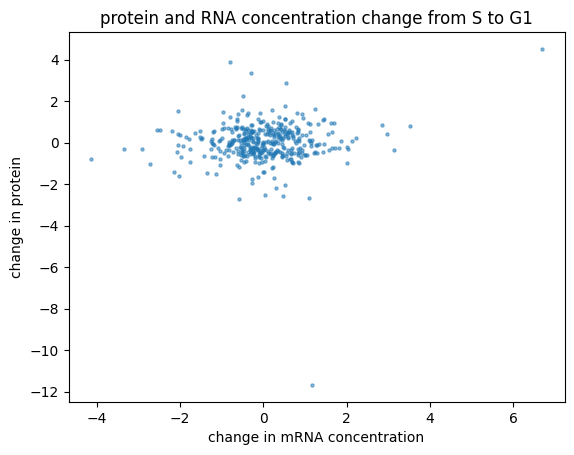

In [ ]:
dataframe.plot.scatter('mean_RNA_G1-S','mean_protein_G1-S', title='protein and RNA concentration change from S to G1', xlabel='change in mRNA concentration', ylabel='change in protein', marker='.', alpha=0.5)
plt.show()

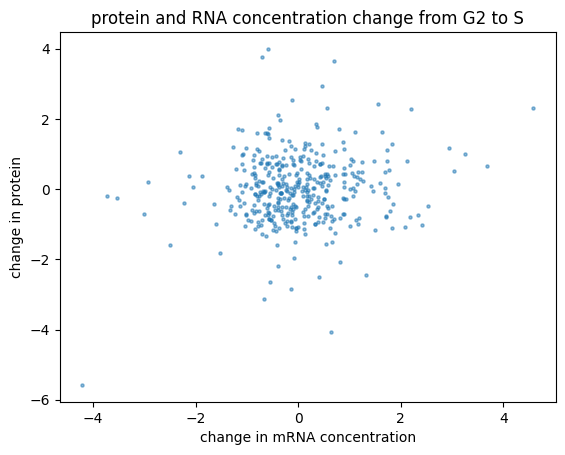

In [ ]:
dataframe.plot.scatter('mean_RNA_S-G2','mean_protein_S-G2', title='protein and RNA concentration change from G2 to S', xlabel='change in mRNA concentration', ylabel='change in protein', marker='.', alpha=0.5)
plt.show()

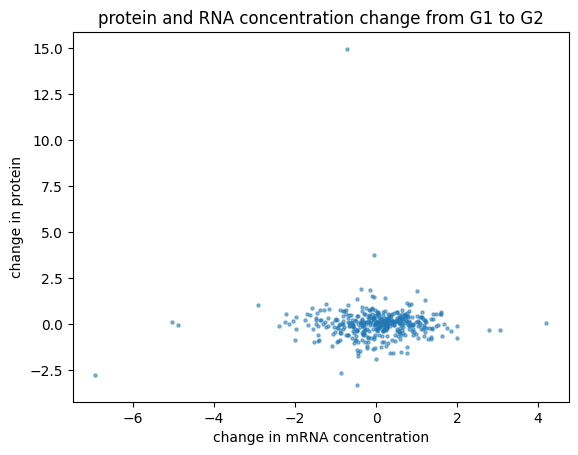

In [ ]:
dataframe.plot.scatter('mean_RNA_G2-G1','mean_protein_G2-G1', title='protein and RNA concentration change from G1 to G2', xlabel='change in mRNA concentration', ylabel='change in protein',marker='.', alpha=0.5)
plt.show()

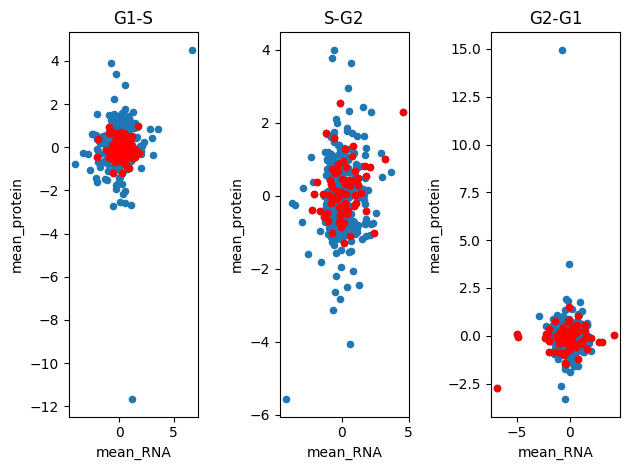

In [ ]:
not_cell_cycle_genes = dataframe[~dataframe['GOBP'].str.contains('cell cycle', case=False)]
cell_cycle_genes = dataframe[dataframe['GOBP'].str.contains('cell cycle', case=False)]

fig, ax = plt.subplots(nrows=1, ncols=3, tight_layout=True)

dataframe.plot.scatter('mean_RNA_G1-S', 'mean_protein_G1-S', ax=ax[0], title='G1-S', xlabel='mean_RNA', ylabel='mean_protein')
dataframe.plot.scatter('mean_RNA_S-G2', 'mean_protein_S-G2', ax=ax[1], title='S-G2', xlabel='mean_RNA', ylabel='mean_protein')
dataframe.plot.scatter('mean_RNA_G2-G1', 'mean_protein_G2-G1', ax=ax[2], title='G2-G1', xlabel='mean_RNA', ylabel='mean_protein')

cell_cycle_genes.plot.scatter('mean_RNA_G1-S', 'mean_protein_G1-S', ax=ax[0], title='G1-S', xlabel='mean_RNA', ylabel='mean_protein', color='red')
cell_cycle_genes.plot.scatter('mean_RNA_S-G2', 'mean_protein_S-G2', ax=ax[1], title='S-G2', xlabel='mean_RNA', ylabel='mean_protein', color='red')
cell_cycle_genes.plot.scatter('mean_RNA_G2-G1', 'mean_protein_G2-G1', ax=ax[2], title='G2-G1', xlabel='mean_RNA', ylabel='mean_protein', color='red')
plt.show()

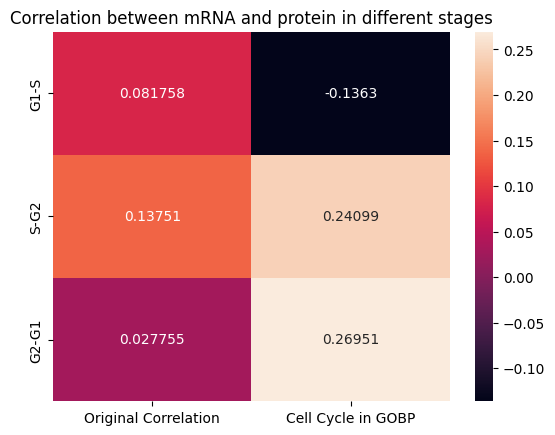

In [ ]:
import seaborn as sns


g1_corr = dataframe['mean_RNA_G1-S'].corr(dataframe['mean_protein_G1-S'])
s_corr = dataframe['mean_RNA_S-G2'].corr(dataframe['mean_protein_S-G2'])
g2_corr = dataframe['mean_RNA_G2-G1'].corr(dataframe['mean_protein_G2-G1'])

cc_g1_corr = cell_cycle_genes['mean_RNA_G1-S'].corr(cell_cycle_genes['mean_protein_G1-S'])
cc_s_corr =  cell_cycle_genes['mean_RNA_S-G2'].corr(cell_cycle_genes['mean_protein_S-G2'])
cc_g2_corr =  cell_cycle_genes['mean_RNA_G2-G1'].corr(cell_cycle_genes['mean_protein_G2-G1'])

dic = {'Original Correlation': [g1_corr, s_corr, g2_corr],
       'Cell Cycle in GOBP': [cc_g1_corr, cc_s_corr, cc_g2_corr]}
data = pd.DataFrame(dic)
sns.heatmap(data=data, annot=data, yticklabels=['G1-S','S-G2','G2-G1'], fmt='.5g')
plt.title('Correlation between mRNA and protein in different stages')
plt.show()

Protein levels over cell cycle stages changes much more when the only including genes that include 'cell cycle' in the GOBP term.

This is likely due proteins are used in cell cycle.

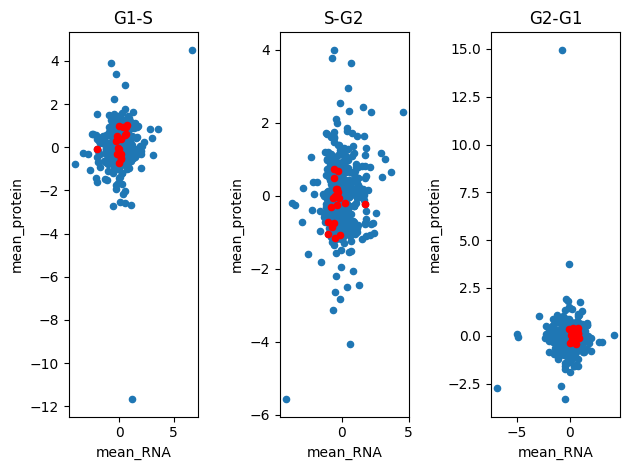

In [ ]:
ribosome_genes = dataframe[dataframe['GOCC'].str.contains('ribosome', case=False)]

fig, ax = plt.subplots(nrows=1, ncols=3, tight_layout=True)

dataframe.plot.scatter('mean_RNA_G1-S', 'mean_protein_G1-S', ax=ax[0], title='G1-S', xlabel='mean_RNA', ylabel='mean_protein')
dataframe.plot.scatter('mean_RNA_S-G2', 'mean_protein_S-G2', ax=ax[1], title='S-G2', xlabel='mean_RNA', ylabel='mean_protein')
dataframe.plot.scatter('mean_RNA_G2-G1', 'mean_protein_G2-G1', ax=ax[2], title='G2-G1', xlabel='mean_RNA', ylabel='mean_protein')

ribosome_genes.plot.scatter('mean_RNA_G1-S', 'mean_protein_G1-S', ax=ax[0], title='G1-S', xlabel='mean_RNA', ylabel='mean_protein', color='red')
ribosome_genes.plot.scatter('mean_RNA_S-G2', 'mean_protein_S-G2', ax=ax[1], title='S-G2', xlabel='mean_RNA', ylabel='mean_protein', color='red')
ribosome_genes.plot.scatter('mean_RNA_G2-G1', 'mean_protein_G2-G1', ax=ax[2], title='G2-G1', xlabel='mean_RNA', ylabel='mean_protein', color='red')
plt.show()

Genes with cell cycle in the GOBP term have a stronger correlation mRNA concentration and protein contentration changes between cell cycle stages.
This may be due to these genes requiring proteins to perform different functions such as deciding where to split the cell.
This means that more or less proteins may be needed during different stages of the cycle.

Ribosome mRNA remains constant throughout the cell cycle as shown by the tighter clusters.
This is likely due to the ribosomes is the site of where proteins are sythesised so is required for various functions throughout the cell's life cycle.

# Exploration of other GO terms

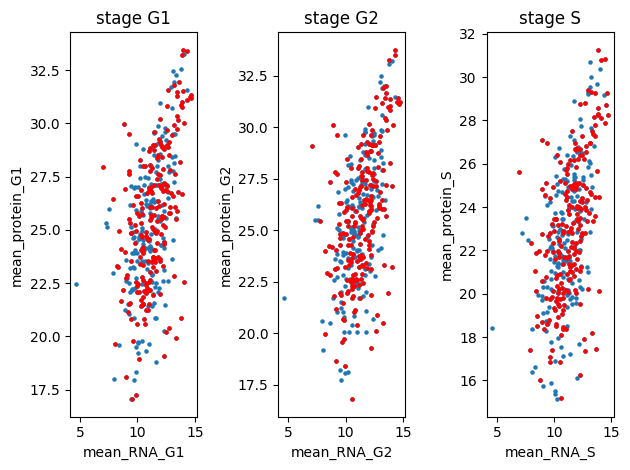

In [ ]:
# Find protein function genss
protein_binding_genes = dataframe[dataframe['GOBP'].str.contains('protein', case=False)]

# create graph of genes
fig,ax = plt.subplots(nrows=1, ncols=3, tight_layout=True)

dataframe.plot.scatter('mean_RNA_G1','mean_protein_G1', ax=ax[0], title='stage G1', xlabel='mean mRNA', ylabel='mean protein', marker='.')
protein_binding_genes.plot.scatter('mean_RNA_G1','mean_protein_G1', ax=ax[0], color='red', marker='.')

dataframe.plot.scatter('mean_RNA_G2','mean_protein_G2', ax=ax[1], title='stage G2', xlabel='mean mRNA', ylabel='mean protein', marker='.')
protein_binding_genes.plot.scatter('mean_RNA_G2','mean_protein_G2', ax=ax[1], color='red', marker='.')

dataframe.plot.scatter('mean_RNA_S','mean_protein_S', ax=ax[2], title='stage S', xlabel='mean mRNA', ylabel='mean protein', marker='.')
protein_binding_genes.plot.scatter('mean_RNA_S','mean_protein_S', ax=ax[2], color='red', marker='.')
plt.show()

protein doesn't seem to have much difference in the correlation between mRNA and protein.

protein may be too general of a term.

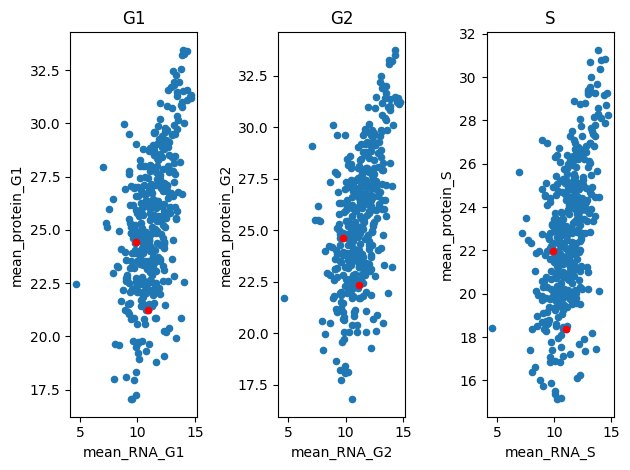

In [ ]:
exon_intron_genes = dataframe[dataframe['GOCC'].str.contains('exon|intron', case=False)]

fig,ax = plt.subplots(nrows=1, ncols=3, tight_layout=True)

dataframe.plot.scatter('mean_RNA_G1','mean_protein_G1', ax=ax[0], title='G1', xlabel='mean_RNA', ylabel='mean_protein')
exon_intron_genes.plot.scatter('mean_RNA_G1','mean_protein_G1', ax=ax[0], color='red')

dataframe.plot.scatter('mean_RNA_G2','mean_protein_G2', ax=ax[1], title='G2', xlabel='mean_RNA', ylabel='mean_protein')
exon_intron_genes.plot.scatter('mean_RNA_G2','mean_protein_G2', ax=ax[1], color='red')

dataframe.plot.scatter('mean_RNA_S','mean_protein_S', ax=ax[2], title='S', xlabel='mean_RN', ylabel='mean_protein')
exon_intron_genes.plot.scatter('mean_RNA_S','mean_protein_S', ax=ax[2], color='red')

plt.show()

Terms containing exon and intron are too few to consider further.
3 samples are not enough.

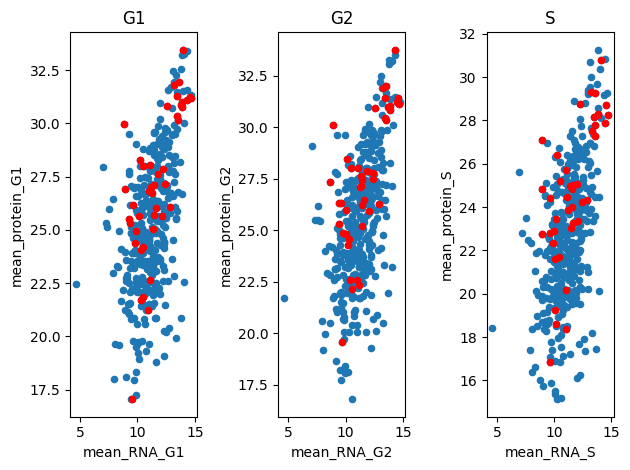

In [ ]:
# Translational initiation

translational_initiation_genes = dataframe[dataframe['GOBP'].str.contains('translation', case=False)]

fig,ax = plt.subplots(nrows=1, ncols=3, tight_layout=True)

dataframe.plot.scatter('mean_RNA_G1','mean_protein_G1', ax=ax[0], title='G1', xlabel='mean_RNA', ylabel='mean_protein')
translational_initiation_genes.plot.scatter('mean_RNA_G1','mean_protein_G1', ax=ax[0], color='red')

dataframe.plot.scatter('mean_RNA_G2','mean_protein_G2', ax=ax[1], title='G2', xlabel='mean_RNA', ylabel='mean_protein')
translational_initiation_genes.plot.scatter('mean_RNA_G2','mean_protein_G2', ax=ax[1], color='red')

dataframe.plot.scatter('mean_RNA_S','mean_protein_S', ax=ax[2], title='S', xlabel='mean_RNA', ylabel='mean_protein')
translational_initiation_genes.plot.scatter('mean_RNA_S','mean_protein_S', ax=ax[2], color='red')

plt.show()

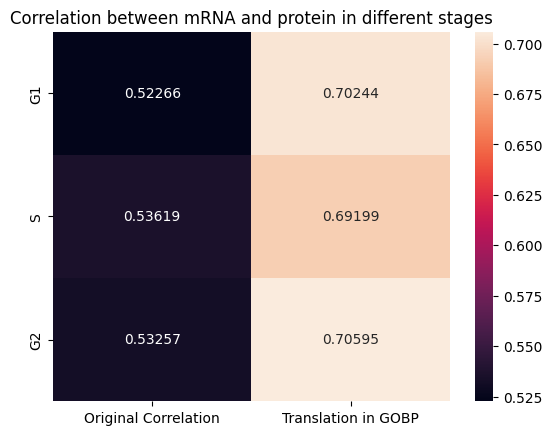

In [ ]:
import seaborn as sns


g1_corr = dataframe['mean_RNA_G1'].corr(dataframe['mean_protein_G1'])
s_corr = dataframe['mean_RNA_S'].corr(dataframe['mean_protein_S'])
g2_corr = dataframe['mean_RNA_G2'].corr(dataframe['mean_protein_G2'])

cc_g1_corr = translational_initiation_genes['mean_RNA_G1'].corr(translational_initiation_genes['mean_protein_G1'])
cc_s_corr =  translational_initiation_genes['mean_RNA_S'].corr(translational_initiation_genes['mean_protein_S'])
cc_g2_corr =  translational_initiation_genes['mean_RNA_G2'].corr(translational_initiation_genes['mean_protein_G2'])

dic = {'Original Correlation': [g1_corr, s_corr, g2_corr],
       'Translation in GOBP': [cc_g1_corr, cc_s_corr, cc_g2_corr]}
data = pd.DataFrame(dic)
sns.heatmap(data=data, annot=data, yticklabels=['G1','S','G2'], fmt='.5g')
plt.title('Correlation between mRNA and protein in different stages')
plt.show()

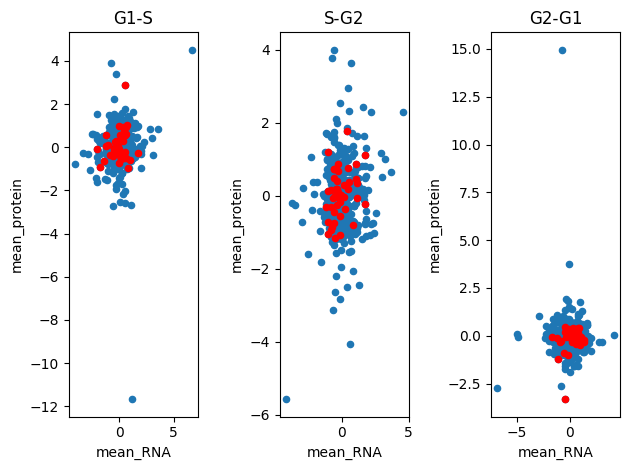

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, tight_layout=True)

dataframe.plot.scatter('mean_RNA_G1-S', 'mean_protein_G1-S', ax=ax[0], title='G1-S', xlabel='mean_RNA', ylabel='mean_protein')
dataframe.plot.scatter('mean_RNA_S-G2', 'mean_protein_S-G2', ax=ax[1], title='S-G2', xlabel='mean_RNA', ylabel='mean_protein')
dataframe.plot.scatter('mean_RNA_G2-G1', 'mean_protein_G2-G1', ax=ax[2], title='G2-G1', xlabel='mean_RNA', ylabel='mean_protein')

translational_initiation_genes.plot.scatter('mean_RNA_G1-S', 'mean_protein_G1-S', ax=ax[0], title='G1-S', xlabel='mean_RNA', ylabel='mean_protein', color='red')
translational_initiation_genes.plot.scatter('mean_RNA_S-G2', 'mean_protein_S-G2', ax=ax[1], title='S-G2', xlabel='mean_RNA', ylabel='mean_protein', color='red')
translational_initiation_genes.plot.scatter('mean_RNA_G2-G1', 'mean_protein_G2-G1', ax=ax[2], title='G2-G1', xlabel='mean_RNA', ylabel='mean_protein', color='red')
plt.show()

Number of mRNA present does not seem to change between cell cycle stages.
It however has a stronger correlation than considering every gene.
The stages are largely unaffected.
This is likely due to the fact that translation is a key process for creating amino acid in the protein.
They are all clusters around the middle in the above graph.